# Taller Talent Land 2022
## Referencia: Reconocimiento Digitos (MNIST)
- **Universidad Marista de Guadalajara (UMG)**
- **Talent Land 2022**
- Instructor: **Iván Reyes**

## Cargar librerías

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.client import device_lib
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout

# Cargar dataset

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Numero de imagenes de entrenamiento: ", X_train.shape[0])
print("Numero de imagenes de prueba: ", X_test.shape[0])

Numero de imagenes de entrenamiento:  60000
Numero de imagenes de prueba:  10000


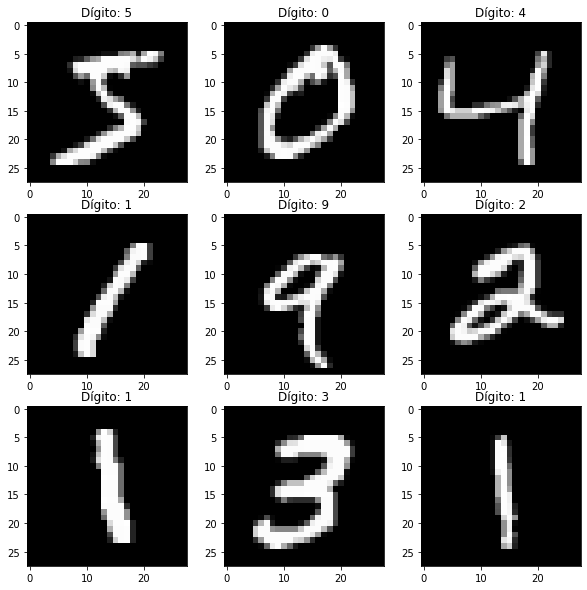

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# create a grid of 3x3 images
plt.figure(figsize=(10, 10))
for i in range(0, 9):
	plt.subplot(330 + 1 + i)
	plt.title(f"Dígito: {y_train[i]}")
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
plt.show()

# Pre-procesamiento
- Codificación de etiquetas *One-hot*
- Formato de datos

In [37]:
# compute the number of labels
num_labels = len(np.unique(y_train))

# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# image dimensions (assumed square)
image_size = X_train.shape[1]
input_size = image_size * image_size

# resize and normalize
X_train = np.reshape(X_train, [-1, input_size])
X_train = X_train.astype('float32') / 255
X_test = np.reshape(X_test, [-1, input_size])
X_test = X_test.astype('float32') / 255

In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000, 10), (10000, 10))

# Modelo de Red Neuronal

## Hyperparámetros
Opciones que le damos al modelo para construirlo y entrenarlo

In [56]:
# neuronas
hidden_units = 50 

# épocas
epochs = 10

# regularización
dropout = 0.45

## Arquitectura del Modelo

In [57]:
model = Sequential(name="TalentLand")
model.add(Dense(hidden_units, input_dim=input_size, activation = "relu"))
model.add(Dropout(dropout))
model.add(Dense(hidden_units, activation = "relu"))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

Model: "TalentLand"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 50)                39250     
                                                                 
 dropout_6 (Dropout)         (None, 50)                0         
                                                                 
 dense_10 (Dense)            (None, 50)                2550      
                                                                 
 dropout_7 (Dropout)         (None, 50)                0         
                                                                 
 dense_11 (Dense)            (None, 10)                510       
                                                                 
 activation_3 (Activation)   (None, 10)                0         
                                                                 
Total params: 42,310
Trainable params: 42,310
Non-traina

In [58]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [59]:
history = model.fit(
    x = X_train,
    y = y_train,
    validation_data = (X_test, y_test),
    epochs = epochs,
    batch_size=128
)

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.9740 - accuracy: 0.6795 - val_loss: 0.3052 - val_accuracy: 0.9135
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.5221 - accuracy: 0.8457 - val_loss: 0.2352 - val_accuracy: 0.9319
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.4442 - accuracy: 0.8704 - val_loss: 0.2098 - val_accuracy: 0.9411
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.4078 - accuracy: 0.8809 - val_loss: 0.1928 - val_accuracy: 0.9462
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3757 - accuracy: 0.8918 - val_loss: 0.1814 - val_accuracy: 0.9479
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3561 - accuracy: 0.8974 - val_loss: 0.1750 - val_accuracy: 0.9498
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3417 - accuracy: 0.9017 - val_loss: 0.1734 - val_accuracy: 0.9512
Epoch 

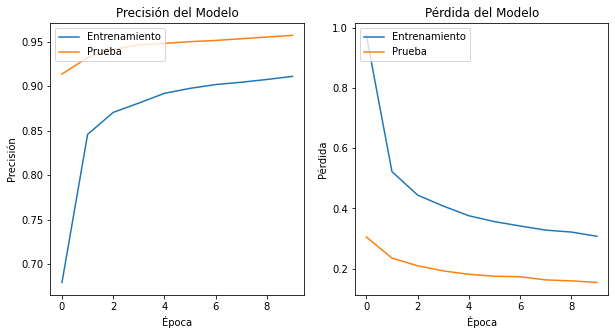

In [60]:
import matplotlib.pyplot as plt

def plot_history(history):

    plt.figure(figsize=(10, 5))

    plt.subplot(121)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Precisión del Modelo')
    plt.ylabel('Precisión')
    plt.xlabel('Época')
    plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')

    plt.subplot(122)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Pérdida del Modelo')
    plt.ylabel('Pérdida')
    plt.xlabel('Época')
    plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')

    plt.show()

plot_history(history)

## Evaluación del Modelo

1/1 [==============================] - 0s 16ms/step


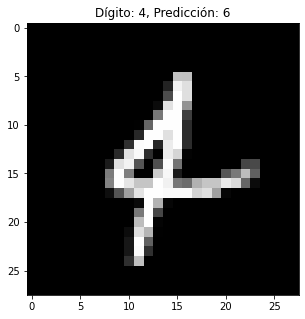

In [100]:
i = 300

test_digit = X_test[i]
test_label = np.argmax(y_test[i])
pred = model.predict(test_digit.reshape(1, -1))
pred_label = np.argmax(pred, axis = 1)
plt.figure(figsize=(5, 5))
plt.title(f"Dígito: {test_label}, Predicción: {pred_label[0]}")
plt.imshow(test_digit.reshape(28, 28), cmap=plt.get_cmap('gray'))
plt.show()


In [101]:
_, acc = model.evaluate(
    X_test,
    y_test,
    batch_size=128,
    verbose=0
)
print("Precisión de la Prueba: %.1f%%" % (100.0 * acc))

Precisión de la Prueba: 95.7%


## Guardar el Modelo

In [50]:
model.save('modelo_talent_land.h5')

## Cargar el Modelo

In [35]:
reconstructed_model = tf.keras.models.load_model("modelo_talent_land.h5")
_, acc = reconstructed_model.evaluate(X_test, y_test)
print("Precisión de la Prueba: %.1f%%" % (100.0 * acc))

313/313 [==============================] - 0s 1ms/step - loss: 0.0644 - accuracy: 0.9835

Test accuracy: 98.4%
